# 1. Data Load, Clean & Pre Process

### 1A. Module Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None, "display.max_rows", 150)

## 1B. Load the Data

In [ ]:
#Connect to Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Excel File
df = pd.read_excel('/content/drive/MyDrive/MOF DAC Data Conquest 2023/Dataset/Processed Data/World Data/Fin/Final Data 50 Countries.xlsx')
df.tail()

,Country Code,Region Code,Income Group Code,Year,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I15,I16,I17,I18,O1,O2,O3,O4,O5,O6,O7,O8,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,O21,O22,O23,O24
2345,ZAF,SSA,3,2018,34.088,5.644,17.941,21.375,47.977,1.378,5.803,0.897,0.688,0.996,14.331,65.068,10.038,8.063,7048.508,1.522,4.040000e+11,6390,2.266,23.390,83.45,65.674,18.6,677.0,21.4,62.202,46.609,23771537,24.220,15.690,1.110000e+11,23.602,1.500400e+07,1.93,439644.6,63.0,20.5
2346,ZAF,SSA,3,2019,34.725,5.928,17.941,21.375,47.977,1.317,5.646,0.884,0.614,0.808,14.184,64.851,9.924,8.243,6688.775,0.303,3.890000e+11,6730,1.962,24.019,82.73,66.175,18.6,615.0,21.4,62.477,46.730,24142655,25.540,16.407,1.060000e+11,23.638,1.479700e+07,1.93,446626.0,63.0,20.5
2347,ZAF,SSA,3,2020,37.886,6.183,17.941,21.375,47.977,0.934,2.017,0.958,0.614,-0.573,13.199,67.020,8.356,8.583,5741.641,0.303,3.380000e+11,6090,2.521,25.130,79.29,65.252,18.4,562.0,21.4,58.349,46.573,22920638,24.340,21.449,9.318402e+10,23.273,3.886600e+06,1.93,393241.6,63.0,20.5
2348,ZAF,SSA,3,2021,34.250,6.562,17.941,21.375,47.977,0.934,2.017,0.810,0.614,0.024,13.596,64.469,8.966,8.583,7055.055,4.913,4.190000e+11,6530,2.468,25.239,80.75,62.341,18.3,513.0,21.4,59.537,46.513,23621462,28.770,21.296,1.310000e+11,24.504,3.886600e+06,1.93,393241.6,63.0,20.5
2349,ZAF,SSA,3,2022,34.250,6.183,17.941,21.375,47.977,2.265,2.017,0.740,0.614,0.531,13.596,64.469,8.966,8.583,6776.480,2.042,4.060000e+11,6780,2.571,25.239,81.36,62.341,18.3,513.0,21.4,59.537,46.482,24308964,29.806,21.296,1.360000e+11,24.443,3.886600e+06,1.93,393241.6,63.0,20.5


In [ ]:
#Take all coll list
#col_list = list(df.drop("Year",axis = 1))
#col_list[:5]

In [ ]:
df.dtypes

Country Code          object
Region Code           object
Income Group Code      int64
Year                   int64
I1                   float64
I2                   float64
I3                   float64
I4                   float64
I5                   float64
I6                   float64
I7                   float64
I8                   float64
I9                   float64
I10                  float64
I15                  float64
I16                  float64
I17                  float64
I18                  float64
O1                   float64
O2                   float64
O3                   float64
O4                     int64
O5                   float64
O6                   float64
O7                   float64
O8                   float64
O10                  float64
O11                  float64
O12                  float64
O13                  float64
O14                  float64
O15                    int64
O16                  float64
O17                  float64
O18           

## 1C. Handle Outlier

In [ ]:
df.shape

(2350, 41)

In [ ]:
#Empty value check
df.isna().sum()

Country Code           0
Region Code            0
Income Group Code      0
Year                   0
I1                     0
I2                     0
I3                     0
I4                     0
I5                     0
I6                   108
I7                     0
I8                     0
I9                     0
I10                  511
I15                    0
I16                    0
I17                    0
I18                    0
O1                     0
O2                     1
O3                     0
O4                     0
O5                     0
O6                     0
O7                     0
O8                     0
O10                    0
O11                    0
O12                   31
O13                    0
O14                    0
O15                    0
O16                    0
O17                    0
O18                    1
O19                    0
O20                    0
O21                  909
O22                    0
O23                    0


In [ ]:
#Empty value check
df.isna().sum().sum()

1654

In [ ]:
from scipy import stats

# Function to remove outliers based on z-score
def remove_outliers(df):
    # Set a threshold for z-score (you can adjust this threshold based on your requirements)
    z_threshold = 3

    # Iterate over columns
    for col in df.columns:
        # Calculate z-score for each value in the column
        z_scores = stats.zscore(df[col])

        # Identify outliers based on the threshold
        outliers = (z_scores > z_threshold) | (z_scores < -z_threshold)

        # Replace outliers with NaN
        df[col][outliers] = None  # You can also choose to remove rows with outliers using df.dropna()

    return df

# Remove outliers
df = remove_outliers(df)

In [ ]:
df.isna().sum().sum()

1654

In [ ]:
df.shape

(2350, 41)

## 1D. Handle NA Value

In [ ]:
#Fill NA Value
#df = df.fillna(method='ffill', axis=0)
df = df.fillna(method='bfill', axis=0)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.tail()

,Country Code,Region Code,Income Group Code,Year,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I15,I16,I17,I18,O1,O2,O3,O4,O5,O6,O7,O8,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,O21,O22,O23,O24
2345,ZAF,SSA,3,2018,34.088,5.644,17.941,21.375,47.977,1.378,5.803,0.897,0.688,0.996,14.331,65.068,10.038,8.063,7048.508,1.522,4.040000e+11,6390,2.266,23.390,83.45,65.674,18.6,677.0,21.4,62.202,46.609,23771537,24.220,15.690,1.110000e+11,23.602,1.500400e+07,1.93,439644.6,63.0,20.5
2346,ZAF,SSA,3,2019,34.725,5.928,17.941,21.375,47.977,1.317,5.646,0.884,0.614,0.808,14.184,64.851,9.924,8.243,6688.775,0.303,3.890000e+11,6730,1.962,24.019,82.73,66.175,18.6,615.0,21.4,62.477,46.730,24142655,25.540,16.407,1.060000e+11,23.638,1.479700e+07,1.93,446626.0,63.0,20.5
2347,ZAF,SSA,3,2020,37.886,6.183,17.941,21.375,47.977,0.934,2.017,0.958,0.614,-0.573,13.199,67.020,8.356,8.583,5741.641,0.303,3.380000e+11,6090,2.521,25.130,79.29,65.252,18.4,562.0,21.4,58.349,46.573,22920638,24.340,21.449,9.318402e+10,23.273,3.886600e+06,1.93,393241.6,63.0,20.5
2348,ZAF,SSA,3,2021,34.250,6.562,17.941,21.375,47.977,0.934,2.017,0.810,0.614,0.024,13.596,64.469,8.966,8.583,7055.055,4.913,4.190000e+11,6530,2.468,25.239,80.75,62.341,18.3,513.0,21.4,59.537,46.513,23621462,28.770,21.296,1.310000e+11,24.504,3.886600e+06,1.93,393241.6,63.0,20.5
2349,ZAF,SSA,3,2022,34.250,6.183,17.941,21.375,47.977,2.265,2.017,0.740,0.614,0.531,13.596,64.469,8.966,8.583,6776.480,2.042,4.060000e+11,6780,2.571,25.239,81.36,62.341,18.3,513.0,21.4,59.537,46.482,24308964,29.806,21.296,1.360000e+11,24.443,3.886600e+06,1.93,393241.6,63.0,20.5


## 1E. One Hot Encoding

In [ ]:
df.shape

In [ ]:
dummies = pd.get_dummies(df[['Country Code','Region Code']],drop_first=True)
df_new = df.drop(['Country Code','Region Code'],axis=1)
df_new = pd.concat([df_new,dummies],axis=1)
df_new.shape

(2350, 94)

In [ ]:
df_new.tail()

,Income Group Code,Year,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I15,I16,I17,I18,O1,O2,O3,O4,O5,O6,O7,O8,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,O21,O22,O23,O24,Country Code_ARG,Country Code_AUS,Country Code_BGR,Country Code_BRA,Country Code_BWA,Country Code_CHL,Country Code_CIV,Country Code_COL,Country Code_DEU,Country Code_ECU,Country Code_ETH,Country Code_GEO,Country Code_GHA,Country Code_GRC,Country Code_GTM,Country Code_HND,Country Code_IDN,Country Code_IND,Country Code_IRN,Country Code_KEN,Country Code_LKA,Country Code_LTU,Country Code_LVA,Country Code_MDA,Country Code_MEX,Country Code_MMR,Country Code_MNG,Country Code_MUS,Country Code_MYS,Country Code_NAM,Country Code_NLD,Country Code_NPL,Country Code_PAK,Country Code_PER,Country Code_PHL,Country Code_PRT,Country Code_PRY,Country Code_ROU,Country Code_SEN,Country Code_SLV,Country Code_SRB,Country Code_TGO,Country Code_THA,Country Code_TUN,Country Code_TZA,Country Code_UKR,Country Code_URY,Country Code_USA,Country Code_ZAF,Region Code_ECA,Region Code_LAC,Region Code_MENA,Region Code_NOAM,Region Code_SA,Region Code_SSA
2345,3,2018,34.088,5.644,17.941,21.375,47.977,1.378,5.803,0.897,0.688,0.996,14.331,65.068,10.038,8.063,7048.508,1.522,4.040000e+11,6390,2.266,23.390,83.45,65.674,18.6,677.0,21.4,62.202,46.609,23771537,24.220,15.690,1.110000e+11,23.602,1.500400e+07,1.93,439644.6,63.0,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2346,3,2019,34.725,5.928,17.941,21.375,47.977,1.317,5.646,0.884,0.614,0.808,14.184,64.851,9.924,8.243,6688.775,0.303,3.890000e+11,6730,1.962,24.019,82.73,66.175,18.6,615.0,21.4,62.477,46.730,24142655,25.540,16.407,1.060000e+11,23.638,1.479700e+07,1.93,446626.0,63.0,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2347,3,2020,37.886,6.183,17.941,21.375,47.977,0.934,2.017,0.958,0.614,-0.573,13.199,67.020,8.356,8.583,5741.641,0.303,3.380000e+11,6090,2.521,25.130,79.29,65.252,18.4,562.0,21.4,58.349,46.573,22920638,24.340,21.449,9.318402e+10,23.273,3.886600e+06,1.93,393241.6,63.0,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2348,3,2021,34.250,6.562,17.941,21.375,47.977,0.934,2.017,0.810,0.614,0.024,13.596,64.469,8.966,8.583,7055.055,4.913,4.190000e+11,6530,2.468,25.239,80.75,62.341,18.3,513.0,21.4,59.537,46.513,23621462,28.770,21.296,1.310000e+11,24.504,3.886600e+06,1.93,393241.6,63.0,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2349,3,2022,34.250,6.183,17.941,21.375,47.977,2.265,2.017,0.740,0.614,0.531,13.596,64.469,8.966,8.583,6776.480,2.042,4.060000e+11,6780,2.571,25.239,81.36,62.341,18.3,513.0,21.4,59.537,46.482,24308964,29.806,21.296,1.360000e+11,24.443,3.886600e+06,1.93,393241.6,63.0,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df = df_new.copy()
df.shape

(2350, 94)

## 1F. Feature Scaling

In [ ]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

In [ ]:
df_test.shape

In [ ]:
df_train.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_train = sc.fit_transform(df_train)
df_test = sc.transform(df_test)

In [ ]:
df = pd.concat([pd.DataFrame(df_train),pd.DataFrame(df_test)])

col_list = list(df_new)

df.columns=col_list

In [ ]:
df.tail()

## 1G. Export Data

In [ ]:
df.to_excel("/content/drive/MyDrive/MOF DAC Data Conquest 2023/Dataset/Processed Data/World Data/Fin/Final Data 50 Countries F.xlsx", index=False)

# 3. Correlation

In [ ]:
df_cr = df.copy()
df_cr.head()

In [ ]:
correlation_matrix = df_cr.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',  # You can choose a different colormap
    ))

# Customize the heatmap layout
fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Variables",
    yaxis_title="Variables",
)

# Show the heatmap
fig.show()


In [ ]:
correlation_matrix.head()

In [ ]:
correlation_matrix.to_excel("/content/drive/MyDrive/MOF DAC Data Conquest 2023/Dataset/Processed Data/Correlation Output.xlsx")

# 4. Regression

## 4A. Copy Dataset

In [ ]:
df.head()

,Country Code,Region Code,Income Group Code,Year,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I15,I16,I17,I18,O1,O2,O3,O4,O5,O6,O7,O8,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,O21,O22,O23,O24
0,ALB,ECA,3,1976,25.891,3.447,29.846,5.867,12.851,NaN,2.272,6.052,0.088,NaN,14.289,58.946,17.567,5.944,639.485,5.746,1.857338e+09,700,36.411,4.794,70.6,68.704,0.1,22.0,26.7,66.995,40.806,1374478,10.307,54.249,335069933.0,17.374,304000.0,NaN,6060.5,27.0,0.5
1,ALB,ECA,3,1977,25.891,3.447,29.846,5.867,12.851,NaN,2.272,6.052,0.088,NaN,14.289,58.946,17.567,5.944,639.485,5.746,1.857338e+09,700,36.411,4.794,70.6,69.121,0.1,22.0,26.7,66.995,40.806,1374478,10.307,54.249,335069933.0,17.374,304000.0,NaN,6060.5,27.0,0.5
2,ALB,ECA,3,1978,25.891,3.447,29.846,5.867,12.851,NaN,2.272,6.052,0.088,NaN,14.289,58.946,17.567,5.944,639.485,5.746,1.857338e+09,700,36.411,4.794,70.6,69.309,0.1,22.0,26.7,66.995,40.806,1374478,10.307,54.249,335069933.0,17.374,304000.0,NaN,6060.5,27.0,0.5
3,ALB,ECA,3,1979,25.891,3.447,29.846,5.867,12.851,NaN,2.272,6.052,0.088,NaN,14.289,58.946,17.567,5.944,639.485,5.746,1.857338e+09,700,36.411,4.794,70.6,69.584,0.1,22.0,26.7,66.995,40.806,1374478,10.307,54.249,335069933.0,17.374,304000.0,NaN,6060.5,27.0,0.5
4,ALB,ECA,3,1980,25.891,3.447,29.846,5.867,12.851,NaN,2.272,6.052,0.088,NaN,14.289,58.946,17.567,5.944,639.485,5.746,1.857338e+09,700,36.411,4.794,70.6,70.478,0.1,22.0,26.7,66.995,40.806,1374478,10.307,54.249,335069933.0,17.374,304000.0,NaN,6060.5,27.0,0.5


In [ ]:
df_reg = df.copy()
X = df_reg.iloc[:, :18]
y = df_reg[["O1"]]

## 4B. Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 4C. Training the Model

### i. XGBoost

In [ ]:
#import xgboost
#from xgboost import XGBRegressor
#regressor = XGBRegressor()
#regressor.fit(X_train, y_train)

### ii. Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
cat_features = ["Country Code","Region Code"]
cat_features

['Country Code', 'Region Code']

In [ ]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.045237
0:	learn: 9413.2651450	total: 58.3ms	remaining: 58.3s
1:	learn: 9094.5128774	total: 68.5ms	remaining: 34.2s
2:	learn: 8769.7726661	total: 79.3ms	remaining: 26.4s
3:	learn: 8486.3801009	total: 89.5ms	remaining: 22.3s
4:	learn: 8172.9692994	total: 103ms	remaining: 20.5s
5:	learn: 7874.8929394	total: 112ms	remaining: 18.6s
6:	learn: 7606.6731638	total: 125ms	remaining: 17.7s
7:	learn: 7327.6701718	total: 131ms	remaining: 16.3s
8:	learn: 7093.4604799	total: 140ms	remaining: 15.5s
9:	learn: 6853.5866093	total: 148ms	remaining: 14.7s
10:	learn: 6647.7165022	total: 159ms	remaining: 14.3s
11:	learn: 6453.6041562	total: 171ms	remaining: 14.1s
12:	learn: 6235.6760166	total: 182ms	remaining: 13.8s
13:	learn: 6014.6343560	total: 197ms	remaining: 13.8s
14:	learn: 5828.7074178	total: 213ms	remaining: 14s
15:	learn: 5661.3344056	total: 224ms	remaining: 13.8s
16:	learn: 5499.6725116	total: 235ms	remaining: 13.6s
17:	learn: 5334.9383104	total: 248ms	remaining: 13.5s
18:	le

### iii. LightGBM

In [ ]:
#!pip install lightgbm

In [ ]:
#from lightgbm import LGBMRegressor

#regressor = LGBMRegressor()

#regressor.fit(X_train, y_train)

## 4D. Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
y_pred[398]

2260.639500549799

In [ ]:
y_test.iloc[398]

O1    2246.192
Name: 906, dtype: float64

## 4E. Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9917370470705681

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-X.shape[1]-1)))

0.9914072618095264


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.1988048876973258

# 5. Calculating SHAP Value

SHAP (SHapley Additive exPlanations)

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.4 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
#Get shap values
explainer = shap.TreeExplainer(regressor)
shap_values = explainer(X_test)

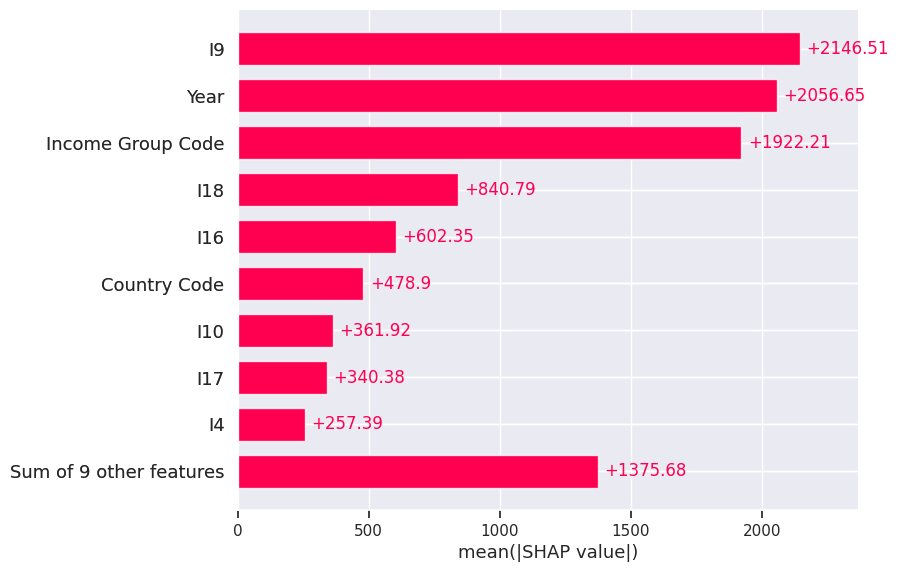

In [ ]:
#Mean SHAP
#column_to_drop = ["Country Code","Region Code"]
#clustering = shap.utils.hclust(
#    X_train.drop(column_to_drop,axis=1), y_train
#)

shap.plots.bar(shap_values)

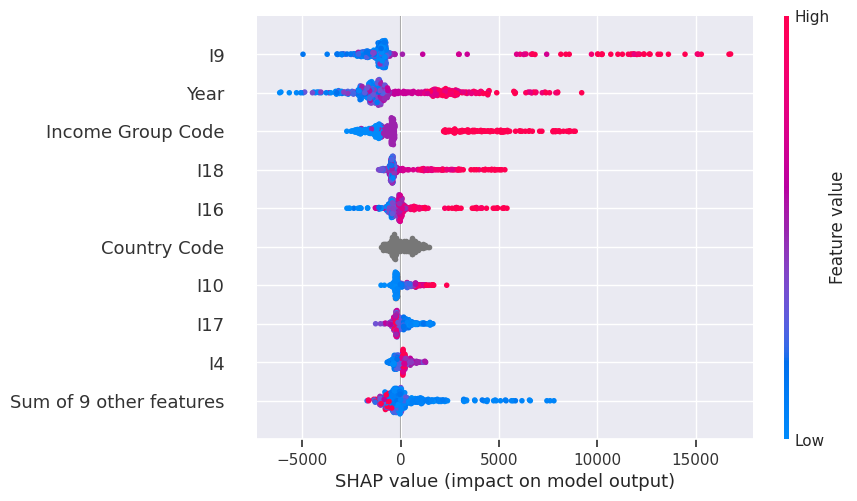

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
#np.abs(shap_values).mean(axis=0)

TypeError: ignored

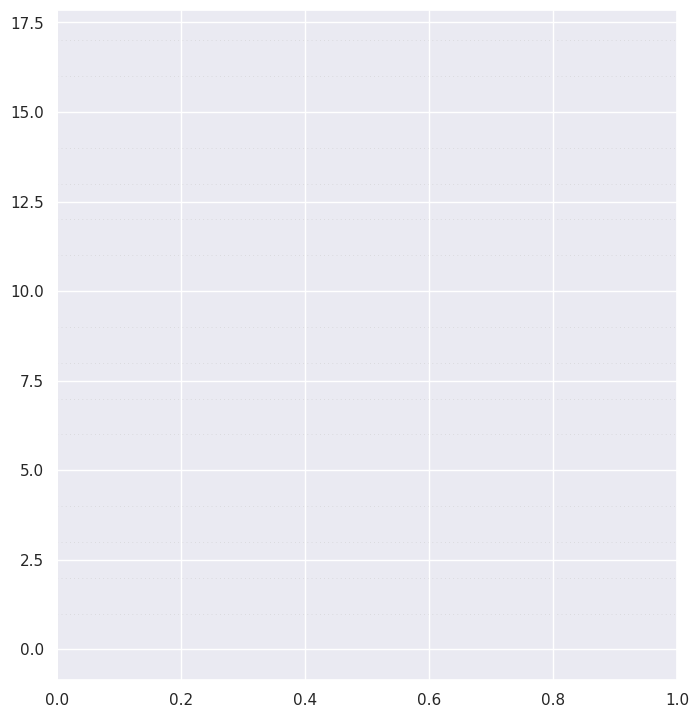

In [ ]:
# violin plot
#shap.plots.violin(shap_values)

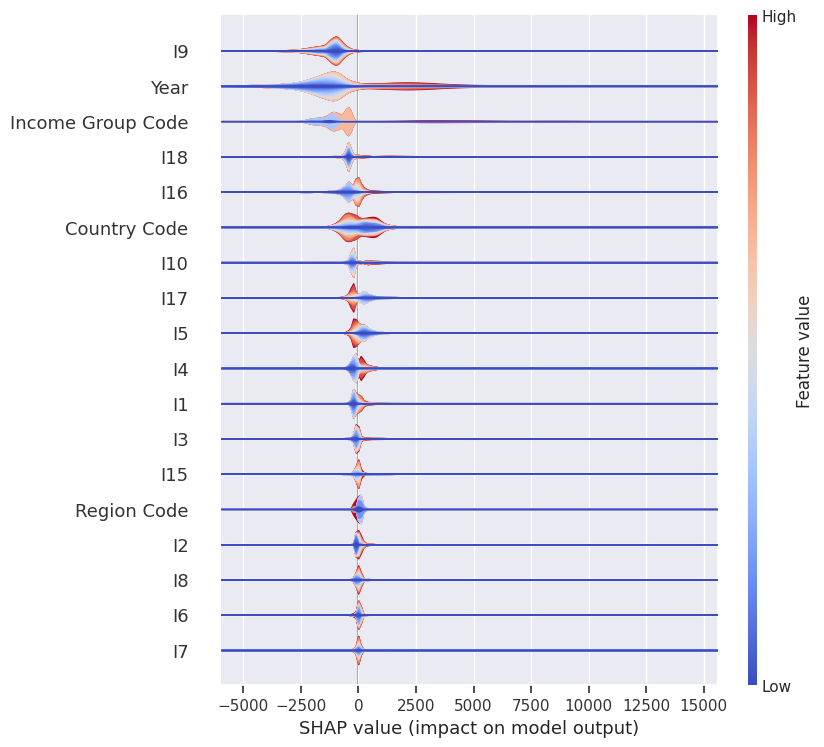

In [ ]:
# layered violin plot
shap.plots.violin(shap_values, plot_type="layered_violin")

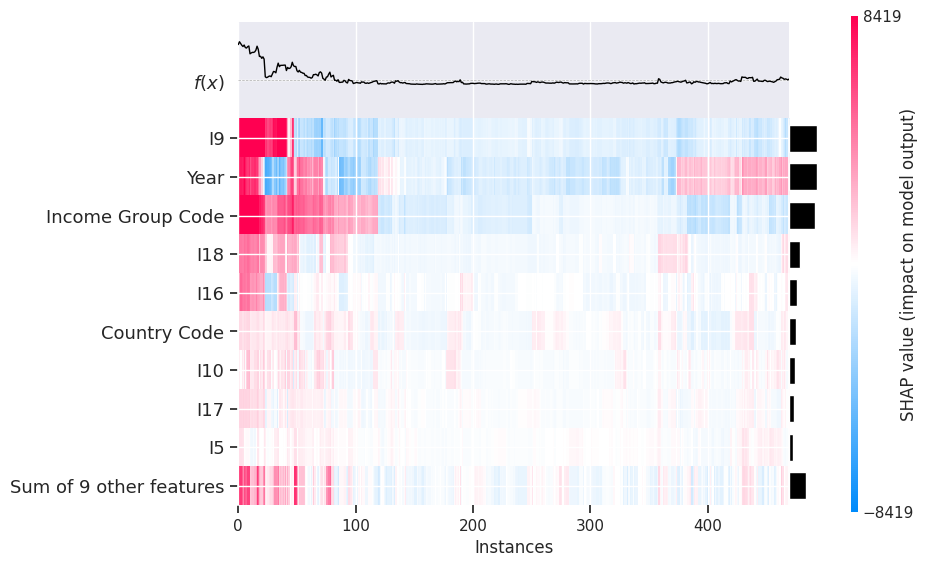

In [ ]:
# heatmap
shap.plots.heatmap(shap_values)

In [ ]:
#  Stacked force plot
shap.initjs()
shap.plots.force(shap_values[0:-100])


## 5A. Visualize a single prediction

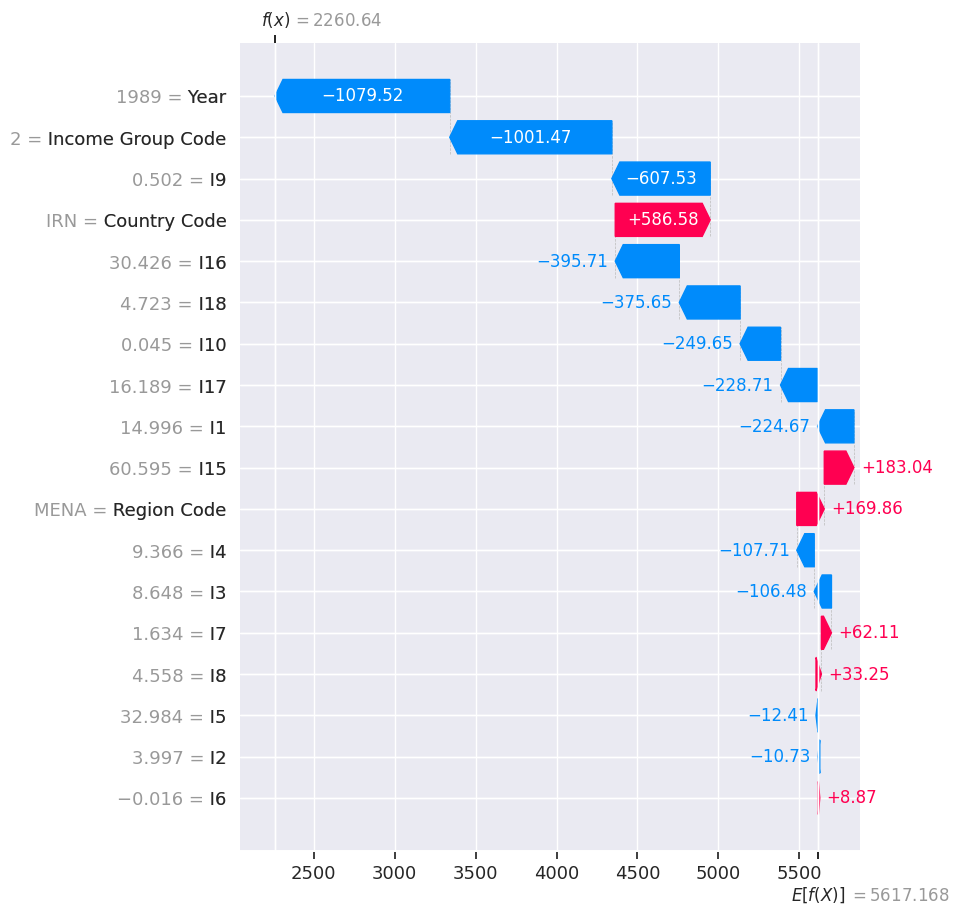

In [ ]:
# Waterfall plot
shap.plots.waterfall(shap_values[398], max_display=20)

In [ ]:
# Forceplot
shap.initjs()
shap.plots.force(shap_values[0])

## 5B. Dependence Chart

In [ ]:
shap.plots.scatter(shap_values[:,"I9"])

In [ ]:
shap.plots.scatter(shap_values[:,"I9"],
                   color=shap_values[:,"I2"])